## Logistic Regression – Using More Intuitive Feature Selection for Easier Interpretation

In this step, I’m transitioning from the EDA phase into building a logistic regression model.  
Instead of using the full one-hot encoded dataset with 50+ features, I’m intentionally **selecting a smaller, more interpretable set of features** that are both relevant and easier to explain in terms of their relationship to the target variable (`y`).

**Rationale for this approach:**
- **Interpretability:** A smaller set of features makes it easier to understand how each variable influences the prediction.
- **Simplicity:** Reduces complexity and multicollinearity issues that can occur with many dummy variables.
- **Focus on meaningful predictors:** Using variables that have clear business or contextual meaning.

**Features selected:**
- `age` – Age of the individual.
- `previous` – Number of previous contacts with the client.
- `emp.var.rate` – Employment variation rate.
- `cons.price.idx` – Consumer price index.
- `cons.conf.idx` – Consumer confidence index.
- `euribor3m` – 3-month Euribor interest rate.
- `nr.employed` – Number of employees.
- `prior_contact` – Binary flag if the client had been previously contacted.
- `campaign_capped` – Number of contacts made during the current campaign (capped).

**Target variable:**
- `y` – Binary outcome indicating if the client subscribed to the term deposit (1) or not (0).

**Next steps:**
1. Split data into training and testing sets.
2. Scale numeric features for logistic regression.
3. Train the model.
4. Evaluate performance (accuracy, classification report, confusion matrix).
5. Optionally, interpret coefficients to understand feature importance.


In [1]:
#lets first import pandas and read from the cleaned dataset
import pandas as pd


df = pd.read_csv('cleaned_bank.csv')

1.Feature selection (My reduced intuitive feature list).

2.Train/test split.

3.Scaling.

4.Model fitting.

5.Evaluation.



1.) Feature Selection

In [2]:
#Feature selection for logistic regression
#We will use the following features for our logistic regression model:
#1. age, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

features_to_keep = [
    'age',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'prior_contact',
    'campaign_capped'
]




### Feature Selection for Logistic Regression

In this step, we define the set of features that will be used as inputs for our logistic regression model.  
The selected features are chosen because they capture key aspects of the client’s profile, economic indicators,  
and campaign history that may influence the outcome.
## Selected Features – Explanation

1. **age**  
   - Client’s age in years.  
   - Captures demographic differences in financial decision-making.  

2. **previous**  
   - Number of contacts with the client in prior campaigns.  
   - High = potential saturation/annoyance, Low = fresh prospect.  

3. **emp.var.rate** (Employment Variation Rate)  
   - Quarterly change in employment (economic indicator).  
   - Rising = stronger job market, recessionary dips reduce conversions.  

4. **cons.price.idx** (Consumer Price Index)  
   - Measure of inflation in goods/services.  
   - High = inflation pressure, lowers disposable income.  

5. **cons.conf.idx** (Consumer Confidence Index)  
   - Sentiment indicator of optimism/pessimism about the economy.  
   - High = clients more willing to invest, Low = cautious spending.  

6. **euribor3m** (Euribor 3-month rate)  
   - Benchmark interest rate for European banks.  
   - Higher rates tighten credit → more conservative client behavior.  

7. **nr.employed**  
   - Macro-level count of employed individuals.  
   - Higher = strong economy, Lower = weaker economic environment.  

8. **prior_contact**  
   - Binary: whether client was contacted in previous campaigns.  
   - Distinguishes new vs. previously exposed prospects.  

9. **campaign_capped**  
   - Modified `campaign` variable with outliers capped.  
   - Reduces distortion from extreme values (e.g., 30+ contact attempts).  

---

### Summary
- **Client-level features:** `age`, `previous`, `prior_contact`, `campaign_capped`.  
- **Macro-economic features:** `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`.  
- Together, these capture both *individual behavior* and *economic context* for more robust modeling.



In [3]:
#keep only selected features compare against the target variable 'y'
X = df[features_to_keep].copy () # Features for the model
y = df['y'].astype(int)  # Convert target variable to integer (0 or 1)

#type(X), type(y)
# ensure binary columns are ints (0/1) not bool/object
X[['prior_contact', 'campaign_capped']] = X[['prior_contact', 'campaign_capped']].astype('category')

### Preparing Features and Target Variable for Logistic Regression

After selecting the features, the next step is to separate the input variables (**X**) and the target variable (**y**) to train our logistic regression model.

**Steps:**
1. **Select Features (X):**  
   - `X = df[features_to_keep].copy()` creates a new dataframe containing only the chosen features.  
   - This prevents accidental changes to the original dataframe while modeling.  

2. **Define Target (y):**  
   - `y = df['y'].astype(int)` extracts the target column (`y`) and converts it to integers (0 or 1).  
   - This ensures the target is properly formatted for binary classification.  

3. **Ensure Correct Data Types for Binary Features:**  
   - `X[['prior_contact', 'campaign_capped']] = ... .astype('category')`  
   - Converts these features into categorical variables (instead of boolean or object).  
   - This helps the model and preprocessing pipelines treat them correctly.  


Identify Column Types
Identify which columns are numeric and which are categorical

In [4]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print('target variable:', y.name + ' 0 or 1:', y.dtype)


Numeric columns: ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical columns: ['prior_contact', 'campaign_capped']
target variable: y 0 or 1: int32


2.) Train/test split.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# test size 20% of rows go to test set, 80% to train set
# random_state ensures reproducibility of the split
# stratify ensures that the proportion of classes in y is maintained in both train and test sets


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

#
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31462, 9) (7866, 9) (31462,) (7866,)


**Train/Test Split — Output Summary**
-------------------------------------

**X_train**: feature matrix used to train the model (rows = training examples, cols = features).  
**y_train**: target labels for those training examples.  
**X_test**: feature matrix held out for evaluating the trained model.  
**y_test**: true labels for the test rows used only to measure performance.  

---

### 🔑 Key differences and why they matter
- **Purpose:**  
  - `X_train` / `y_train` → learn model parameters.  
  - `X_test` / `y_test` → assess how the learned model generalizes to unseen data.  

---

### 📊 What the Output Means
- `X_train` → 31,462 rows × 9 features (80% of the data)  
- `X_test`  →  7,866 rows × 9 features (20% of the data)  
- `y_train` → 31,462 labels (matches X_train rows)  
- `y_test`  →  7,866 labels (matches X_test rows)  

---

### 🧮 Why the Numbers Make Sense
- **Total rows:**  
  31,462 + 7,866 = 39,328 total rows in dataset.  

- **80/20 split check:**  
  - Train: 39,328 × 0.8 ≈ 31,462  ✅  
  - Test:  39,328 × 0.2 ≈  7,866  ✅  

- **Same features in train/test:**  
  Both X_train and X_test have exactly 9 columns (features).  


Now I need to scale continous features, fit logistic regression on X_train/y_train

3.) Scaling

In [6]:
#Now lets do some preprocessing of the data
#Preprocessing is important for machine learning models to ensure that the data is in the right format
#Preprocessing = cleaning, imputing, encoding, scaling, etc.
#Typical steps, 1.) train test split, 2.) categorical encoding, 3.) scaling, 4.) model training

#We already did the train test split above, now we will do categorical encoding and scaling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#time to do one-hot encoding for categorical features
preprocessor = ColumnTransformer (

    transformers = [
        ('num', StandardScaler(), numeric_cols),  # Scale numeric columns
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # One-hot encode categorical columns, ignore unknown categories during transformation
    ]
    , remainder= "drop"  # Drop any columns not specified in the transformers list, because we only want to keep the selected features
)

#Now we do a pipeline to combine preprocessing with the model
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),  # Preprocessing step
    ('clf', LogisticRegression(class_weight = 'balanced',max_iter=1000))  # Logistic Regression model, balannced class weights to handle class imbalance

])

## 📦 Preprocessing + Modeling Pipeline — Deep Dive (What I'm doing & why)

### 🎯 Objective
Create a **reproducible, leak-free** ML workflow that:
1) transforms features appropriately (scaling + encoding),  
2) keeps your feature set controlled, and  
3) trains a **logistic regression** that accounts for **class imbalance**.

Pipeline: chains preprocessing steps and a final estimator so you call fit/transform/predict once. It guarantees transforms are applied in the correct order and prevents data leakage ( fit transforms only on X_train).

ColumnTransformer: applies different transforms to different column subsets (e.g., scale numeric, one-hot encode categorical) and returns a single feature matrix the estimator can use.

Benefits: simpler code, fewer mistakes (no manual concat/typos), reproducible transforms saved with the model, and safe train/test separation.

## 🔎 Why One-Hot Encoding for `prior_contact` and `campaign_capped`

---

### 1) `prior_contact` (binary categorical: Yes/No)
- Original feature: `"Yes"` or `"No"`.
- One-hot encoding expands this into **two columns**:

| prior_contact | prior_contact_Yes | prior_contact_No |
|---------------|-------------------|------------------|
| Yes           | 1                 | 0                |
| No            | 0                 | 1                |

**Why this matters:**
- Logistic regression can’t directly use text labels, it needs numeric values.  
- One-hot encoding prevents the model from assuming `"Yes=1"` is “greater” than `"No=0"`.  
- The model learns separate coefficients:  
  - `"Yes"` might increase the probability of conversion.  
  - `"No"` might decrease it.  

---

### 2) `campaign_capped` (capped version of contact attempts)
- Original variable: number of contacts made during the campaign.  
- Capped to avoid outliers (e.g., clients contacted 30+ times).  
- Treated as **categorical buckets** instead of continuous numbers:

Example buckets:  
- `"1 contact"`  
- `"2 contacts"`  
- `"3 contacts"`  
- `"4 contacts"`  
- `"5+ contacts"`  

One-hot encoding expands this into multiple binary columns:

| campaign_capped | camp_1 | camp_2 | camp_3 | camp_4 | camp_5plus |
|-----------------|--------|--------|--------|--------|------------|
| 1               | 1      | 0      | 0      | 0      | 0          |
| 3               | 0      | 0      | 1      | 0      | 0          |
| 7 (capped→5+)   | 0      | 0      | 0      | 0      | 1          |

**Why this matters:**
- If left numeric, the model would assume a **linear relationship** (e.g., each additional call has the same effect).  
- In reality, effects may differ:
  - 1–2 calls could increase conversion chances.  
  - 5+ calls may actually hurt conversion (client fatigue).  
- One-hot lets the model learn **separate effects for each bucket**.

---

### ✅ Bottom line
- **`prior_contact`** → One-hot ensures binary categories are treated as distinct groups, not numbers on a scale.  
- **`campaign_capped`** → One-hot lets the model handle different contact attempt ranges independently, capturing non-linear effects.


4.) Fit Model

In [7]:
#now I need to fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['prior_contact',
                                                   'campaign_capped'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Understanding `pipeline.fit(X_train, y_train)`

When you call `pipeline.fit(X_train, y_train)`, scikit-learn runs each step of the pipeline in order:

1. **Preprocessing Step (`preprocessor`)**  
   - Numeric columns → scaled using `StandardScaler()` (mean = 0, std = 1).  
   - Categorical columns → encoded using `OneHotEncoder()` (creates binary columns for categories).  
   - Any columns not specified remain unchanged (`remainder='passthrough'`).  
   - The preprocessor *learns* from the training data (e.g., category values, scaling parameters).

2. **Model Training Step (`LogisticRegression`)**  
   - The transformed training data is passed into the logistic regression model.  
   - The model learns patterns between features (`X_train`) and the target (`y_train`).  
   - Using `class_weight='balanced'` tells the model to adjust for class imbalance by giving more weight to underrepresented classes.  

---

### Why use a Pipeline?
- **Prevents data leakage**: Preprocessing is learned only from training data and applied consistently to new/test data.  
- **Cleaner code**: One object handles all steps instead of writing them separately.  
- **Consistency**: Guarantees that the same transformations are applied during training and prediction.

---

✅ **In short:**  
`pipeline.fit(X_train, y_train)` means *“fit the preprocessing steps on the training data, transform it, and then train the logistic regression model on the processed data.”*


5.) Evaluate

## 📊 Model Evaluation Checklist

1. **Predict on `X_test` and compute metrics**  
   - Accuracy, Precision, Recall, F1-score, ROC AUC, and Confusion Matrix. ✅  

2. **Inspect predicted probabilities**  
   - Evaluate probability outputs (via `predict_proba`).  
   - Consider **threshold tuning** if the key business metric is not default accuracy. ✅  

3. **Interpret model coefficients**  
   - Use `preprocessor.get_feature_names_out()` to align coefficients with feature names.  
   - Analyze direction (+/-) and relative importance of features. ✅  

4. **Cross-validation / Hyperparameter tuning**  
   - Run Stratified K-Fold or `GridSearchCV` for robust tuning.  
   - Confirm stability of results across folds. ✅  

5. **Check calibration and precision-recall**  
   - Use calibration plots (e.g., `CalibrationDisplay`).  
   - Precision-Recall curves are especially important for imbalanced datasets. ✅  

6. **Save the pipeline for reuse**  
   - Store the full pipeline (preprocessing + model) with `joblib.dump()`.  
   - Reload later with `joblib.load()` for deployment or further evaluation. ✅  


In [8]:
#Now we can make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]  # Probability estimates for the positive class

#From the above,  lets computer metrics to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)   
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7346
Precision: 0.2628
Recall: 0.7059
F1 Score: 0.3830
ROC AUC: 0.7651
Confusion Matrix:
[[5130 1818]
 [ 270  648]]


# Model Performance Summary

## 🔹 Metrics
- **Accuracy (73.46%)**  
  About three-quarters of predictions are correct.  
  ⚠️ Can be misleading if classes are imbalanced.

- **Precision (26.28%)**  
  Only 26% of predicted positives are actually positive.  
  → Many **false positives**.

- **Recall (70.59%)**  
  Model correctly identifies ~71% of all real positives.  
  → High **true positive detection**.

- **F1 Score (38.30%)**  
  Low because precision is poor, even though recall is good.

- **ROC AUC (0.7651)**  
  Model ranks positives vs. negatives fairly well across thresholds.

---

## 🔹 Confusion Matrix


- **True Negatives (TN): 5130**  
- **False Positives (FP): 1818** → Main issue.  (Model predicted "yes" but the customer actually said no.)
- **False Negatives (FN): 270**  
- **True Positives (TP): 648**  

---

## 🔹 Interpretation
- The model is **recall-oriented**:
  - Finds most positives (**good recall**).  
  - Mislabels many negatives as positives (**poor precision**).  

- **When this is good**: medical screening, fraud detection, AML → better to flag too many than miss true cases.  
- **When this is bad**: spam filters, recommendation systems → too many false alarms.

---

## 🔹 Next Steps
The threshold gave me high recall but low precision.

Next step: experiment with different thresholds to see how precision/recall trade off.

---

✅ **Summary**:  
My model **catches most positives but at the cost of many false alarms**.  


## 🔑 What is the Threshold?

### 1) Model outputs probabilities, not just Yes/No
- Logistic Regression predicts a **probability between 0 and 1** for each client.  
  - Example: "This customer has a 0.72 probability of subscribing."

### 2) Threshold = cutoff for decision
- If **probability ≥ threshold → predict Yes (subscribe)**  
- If **probability < threshold → predict No (not subscribe)**  

---

## 📊 Default threshold (0.5)
- Standard cutoff = **0.5**  
- Only customers with ≥50% probability are classified as "Yes."  
- Conservative approach → higher precision, but may miss some actual subscribers (lower recall).

---

## 🎯 Lowering the threshold (e.g., 0.3)
- At threshold = 0.3:  
  - Customers with ≥30% probability are classified as "Yes."  
  - **More positives are flagged** → recall increases.  
  - **But** more uninterested customers are also flagged → precision decreases.

---

## ⚖️ Why this matters in Bank Marketing
- **False Positives (FP):** extra marketing calls → minor cost.  
- **False Negatives (FN):** lost subscribers → lost revenue.  

Since FNs are more harmful, **recall is prioritized over precision**.  
→ Lowering the threshold helps capture more actual subscribers, even if it means more wasted calls.

---

## ✅ Summary
- **Threshold** = probability cutoff for predicting Yes vs No.  
- **Higher threshold** → fewer positives, higher precision, lower recall.  
- **Lower threshold** → more positives, higher recall, lower precision.  
- In this project: lowering the threshold (0.3 vs 0.5) boosts recall, which is more important for the bank.


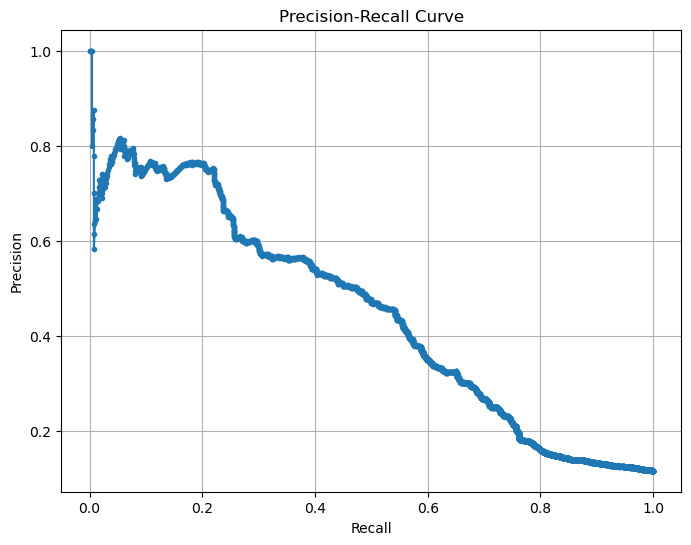

In [9]:
#time to adjust the classification threshold
import numpy as np
import matplotlib.pyplot as plt
# --- IGNORE ---
# Calculate precision and recall for different thresholds
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker = '.')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')
plt.grid()

# Precision vs Recall in the Bank Marketing Project

## 🔹 Precision
- Precision = Of all the customers the model predicts will subscribe, how many actually do?
- High precision means fewer wasted marketing calls (fewer false positives).
- Low precision means many customers predicted as subscribers won’t actually subscribe.

## 🔹 Recall
- Recall = Of all the customers who actually subscribe, how many did the model correctly identify?
- High recall means the model captures most potential subscribers (few false negatives).
- Low recall means the bank misses many customers who would have subscribed.

---

## 🔹 Which Matters More Here?
For the bank marketing problem:
- **False Positives (FP):** Wasted calls/resources, but the bank simply spends a little extra time contacting uninterested customers.
- **False Negatives (FN):** Lost revenue opportunities, because the bank fails to contact a customer who would have subscribed.

Since **missing actual subscribers (FN)** is worse than calling uninterested ones (FP), **recall is more important than precision** for this project.

---

## 🔹 Next Step: Threshold Adjustment
- By default, Logistic Regression uses a **0.5 threshold**: predict "yes" if probability ≥ 0.5.
- At 0.5, the model has **moderate recall (~71%) but low precision (~26%)**.
- To **increase recall further**, the next step is to **lower the threshold to 0.3**:
  - This makes the model more "generous" in predicting positives.
  - More actual subscribers will be caught (higher recall).
  - Precision will likely decrease, but that trade-off is acceptable here.

---

✅ **Summary**:  
In this project, recall is the priority. The next step is to compare performance at **threshold = 0.3 vs threshold = 0.5** to maximize recall while monitoring precision. This ensures the model finds as many potential subscribers as possible, even if it means contacting more uninterested customers.


In [10]:
#Let's lower the threshold from 0.5 to 0.3 to increase recall
optimal_threshold = 0.3
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int) #this line creates a new array of predictions based on the optimal threshold


#Now let's comput the metrics again with the new threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score (y_test, y_pred_optimal)
roc_auc_optimal = roc_auc_score(y_test, y_pred_proba)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

print(f'Optimal Threshold: {optimal_threshold}')
print(f'Accuracy: {accuracy_optimal:.4f}')
print(f'Precision: {precision_optimal:.4f}')
print(f'Recall: {recall_optimal:.4f}')
print(f'F1 Score: {f1_optimal:.4f}')
print(f'ROC AUC: {roc_auc_optimal:.4f}')
print('Confusion Matrix:')
print(conf_matrix_optimal)

Optimal Threshold: 0.3
Accuracy: 0.4892
Precision: 0.1607
Recall: 0.7996
F1 Score: 0.2676
ROC AUC: 0.7651
Confusion Matrix:
[[3114 3834]
 [ 184  734]]


### Model Summary — Threshold = **0.3**
- **Accuracy:** 0.4892  
- **Precision:** 0.1607  
- **Recall:** **0.7996**  
- **F1 Score:** 0.2676  
- **ROC AUC (thr-invariant):** 0.7651  

**Confusion Matrix (T=0.3)**  
- TN: 3114 | FP: 3834  
- FN: 184  | TP: 734  

**TL;DR:** Lowering the threshold increased **recall** (fewer false negatives) at the cost of **precision** and **accuracy**—expected for a recall-focused setting.
"""))

In [11]:
#Lets now map coefficients back to feature names
#Get feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
#Get coefficients from the logistic regression model
coefficients = pipeline.named_steps['clf'].coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coeff = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute value of coefficients in descending order
coeff['Abs_Coefficient'] = coeff['Coefficient'].abs()
coeff = coeff.sort_values(by = 'Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])


# show top 3 positive and top 3 negative coefficients
top_pos = coeff.sort_values(by='Coefficient', ascending=False).head(3)
top_neg = coeff.sort_values(by='Coefficient', ascending=True).head(3)

print("Top 3 positive coefficients:")
print(top_pos.to_string(index=False))
print("\nTop 3 negative coefficients:")
print(top_neg.to_string(index=False))


Top 3 positive coefficients:
               Feature  Coefficient
  cat__prior_contact_1     1.123577
cat__campaign_capped_1     0.165233
        num__euribor3m     0.161067

Top 3 negative coefficients:
             Feature  Coefficient
cat__prior_contact_0    -0.832709
   num__emp.var.rate    -0.542067
    num__nr.employed    -0.538288


**Interpretation**
- Prior contact is the strongest signal: customers with prior contact are most likely to convert.
- Macro indicators (`emp.var.rate`, `nr.employed`) are negatively associated with conversion in this sample.
- `euribor3m` and some `campaign_capped` levels have small positive associations.


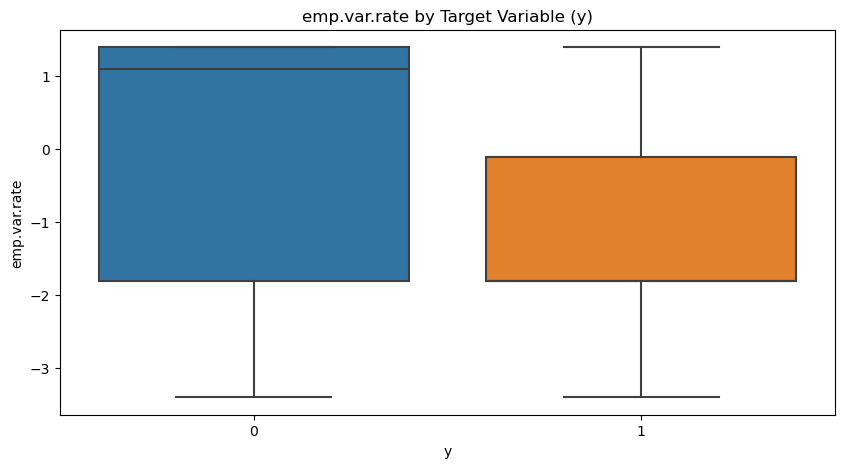

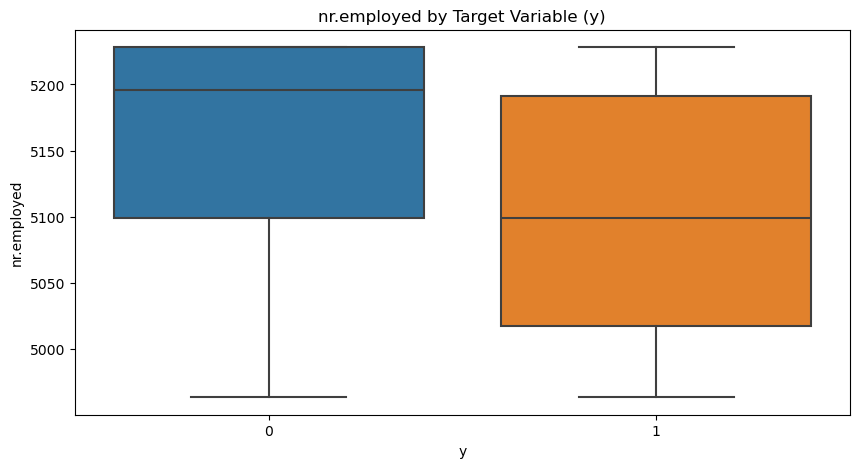

In [12]:
#Lets take a look at how emp.var.rate and nr.employed are related to the target variable
import seaborn as sns

# Plotting the relationship between emp.var.rate and the target variable y
plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='emp.var.rate', data=df)
plt.title('emp.var.rate by Target Variable (y)')
plt.show()

# Plotting the relationship between nr.employed and the target variable y
plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='nr.employed', data=df)
plt.title('nr.employed by Target Variable (y)')
plt.show()



- **What `y` means:** `y=1` = converted, `y=0` = did not convert.

- **emp.var.rate**
  - The **converted group (y=1)** sits **lower** on the boxplot than the non-converted group.
  - Translation: **higher** `emp.var.rate` values tend to be linked with **lower** conversion on average.
  - There’s overlap between groups, so treat it as a trend, not a rule.
  -When emp.var.rate is higher/positive (employment growing → “good times”), conversion tends to go down.
  -When emp.var.rate is lower/negative (employment shrinking → “worse times”), conversion tends to go up—people park money in safer term deposits.

- **nr.employed**
  - The **converted group (y=1)** also shows **lower** values than the non-converted group.
  - Translation: when `nr.employed` is **higher**, conversion is **less likely** on average.
  - Again, distributions overlap—likely a modest effect.
  -when overall employment is higher (good economy), term-deposit conversion tends to be lower; when employment is lower (worse economy), conversions tend to be higher.

**Why it matters:** Both visuals support the **negative coefficients** for these variables in your logistic regression.



In [13]:
#Next step is to do a cross-validation to ensure the model is robust and not overfitting
from sklearn.model_selection import cross_val_score
# Perform cross-validation

cv_scores = cross_val_score(pipeline, X, y, cv = 5, scoring = 'roc_auc')  # 5-fold cross-validation
print(f'Cross-validated ROC AUC scores: {cv_scores}')
print(f'Mean ROC AUC score: {np.mean(cv_scores):.4f}')


Cross-validated ROC AUC scores: [0.13597062 0.1915039  0.67928602 0.52032538 0.4207247 ]
Mean ROC AUC score: 0.3896


### What This Means

1. **Low Overall Performance**
   - Mean ROC AUC = **0.39**, which is **worse than random guessing (0.5)**.
   - Suggests the model isn’t learning meaningful signal from the data.

2. **High Variability Across Folds**
   - Scores range from **0.13 → 0.68**.
   - Indicates instability:
     - Dataset may be small or **highly imbalanced**.
     - Certain folds contain patterns the model can fit, while others don’t generalize.

3. **Possible Overfitting or Data Issues**
    -I believe the reason is the data is highly imbalanced, most all customers say no.
    -Consider stratified cross-validation
    -Cross-validation (CV) is a technique to evaluate model performance more reliably by splitting the dataset into multiple “folds” and training/testing across them.


In [14]:
# To deal with the imbalanced dataset, we can use stratified cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
print(f"Stratified CV ROC AUC: {cv_scores}")
print(f"Mean: {cv_scores.mean():.4f}")



Stratified CV ROC AUC: [0.75398886 0.75547347 0.74659402 0.76851311 0.76573946]
Mean: 0.7581


### Cross-Validation Summary

- **What I Did**
  - Switched from regular K-Fold to **Stratified K-Fold Cross-Validation** to deal with the imbalanced dataset.
  - This ensured each fold had a similar ratio of converters (`y=1`) to non-converters (`y=0`).

- **Results**
  - **ROC AUC per fold:** [0.754, 0.755, 0.747, 0.769, 0.766]
  - **Mean ROC AUC:** 0.758

- **Why It Matters**
  - Before: Regular CV gave unstable scores (0.13 → 0.68) with a mean of 0.39, showing unreliable performance.
  - After stratification: Scores are consistent (~0.75–0.77) and the mean jumped to **0.76**.
  - AUC ~0.76 means the model can correctly rank a random converter above a random non-converter ~76% of the time.

✅ **Key Takeaway:**  
Stratified cross-validation fixed instability from class imbalance and showed the model is **robust, consistent, and genuinely learning useful patterns.**


In [15]:
#Save pipeline model using joblib
import joblib
joblib.dump(pipeline, 'logistic_regression_pipeline.joblib', compress=3)

['logistic_regression_pipeline.joblib']